# ETF Analaysis 

## Convert Everything in Piyush code to Object Oriented Programming Code

In [42]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
import numpy as np
import os
import time

##### ETF Data Clean up ###########

class ETFDataCleanup(object):
    
    def __init__(self):
        pass

    def showNaColumns(self,df):
        s=df.isnull().sum()
        print(s[s>0])
    
    def dropNAColumns(self,df):
        return df.dropna(axis='columns')
    
    def computeDailyReturns(self,df):
        return df.pct_change().dropna()        
    
    
####### Get Data for Constituents of ETF

class ConstituentsData(ETFDataCleanup):
    
    def __init__(self,fileName=None,startdate=None,enddate=None):
        self.fileName=fileName
        self.startdate=startdate
        self.enddate=enddate
        self.constituentdata=[]
        self.constituentcloseDF=[]
        self.tickerdf=[]
        self.changeDF=[]
        self.waDF=[]
    
    def getconstituentdata(self):
        self.tickerdf = pd.read_excel(self.fileName)
        tickers=self.tickerdf['Ticker']
        self.tickerdf.set_index('Ticker',inplace=True)
        self.constituentdata =  web.DataReader(tickers,'yahoo',self.startdate,self.enddate)
        self.constituentcloseDF = self.constituentdata['Close'].iloc[:, :]
        
    def stringWeightsToFloat(self):
        self.tickerdf['Weights']=self.tickerdf['Weights'].apply(lambda x: x.replace('%','')).astype(float)
    
    def findNetAssetValue(self):
        self.waDF=self.changeDF
        for col in self.changeDF.columns:
            self.waDF[col]=self.changeDF[col]*self.tickerdf['Weights'].loc[col]
        self.waDF['NAV']=self.waDF.sum(axis=1)/100

####### Get prices of ETF        
class ETFStockPrices(ETFDataCleanup):
    
    def __init__(self,etfticker=None,startdate=None,enddate=None):
        self.etfticker=etfticker
        self.startdate=startdate
        self.enddate=enddate
        self.etfdata=[]
        self.etfchangeDF=[]

        
    def getETFTickerData(self):
        self.etfdata =  web.DataReader(self.etfticker,'yahoo',self.startdate,self.enddate)
 


class ETFArbitrage(object):

    def __init__(self,etfob,waDF):
        self.navDF=pd.merge(etfob,waDF['NAV'],left_index=True,right_index=True)
        self.navDF['Date']=self.navDF.index
        self.difDF=[]
    
    def scatterplot(self):
        plt.scatter(self.navDF['Close'],self.navDF['NAV'])
        
    def scatterplot2(self):
        #change figure size for the plot
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0]=12
        fig_size[1]=6
        plt.rcParams["figure.figsize"]=fig_size

        self.difDF=self.navDF['Close']-self.navDF['NAV']
        plt.scatter(self.navDF['Date'],self.difDF)
    
    def seaborndist(self):
        sns.distplot(self.difDF.values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

## Handle

In [43]:
def mainhandle(filename,startdate,enddate,tickeretf):
    ob=ConstituentsData(fileName=filename,startdate=startdate,enddate=enddate)
    ob.getconstituentdata()
    print(tickeretf)
    print("Tickers with NA Values")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.constituentcloseDF=ob.dropNAColumns(ob.constituentcloseDF)
    print("***************")
    print("Check for NA Values again")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.changeDF=ob.computeDailyReturns(ob.constituentcloseDF)
    ob.stringWeightsToFloat()
    ob.findNetAssetValue()

    print("***************")
    print("Data for Constituents")
    #print(ob.waDF.head(5))

    etfob=ETFStockPrices(etfticker=tickeretf,startdate=dt.datetime(2019,1,1),enddate=dt.datetime(2020,1,22))
    etfob.getETFTickerData()
    print("Show Any Empty Values")
    etfob.showNaColumns(etfob.etfdata)
    etfob.etfchangeDF=etfob.computeDailyReturns(etfob.etfdata['Close'])

    print("***************")
    print("Data for ETF stock prices")
    #print(etfob.etfchangeDF.head(5))

    print("****************")
    print("Charts")
    arbob=ETFArbitrage(etfob.etfchangeDF,ob.waDF)
    arbob.scatterplot()
    plt.show()
    arbob.scatterplot2()
    plt.show()
    arbob.seaborndist()
    plt.show()

# Analayze all ETFs together

XLK
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


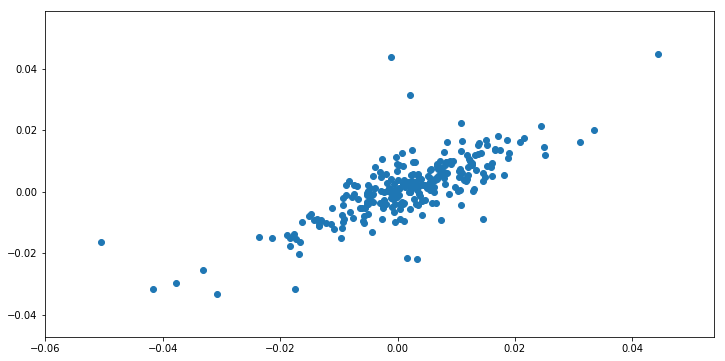

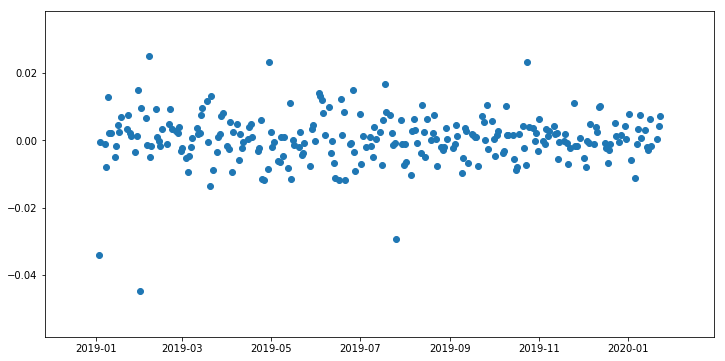

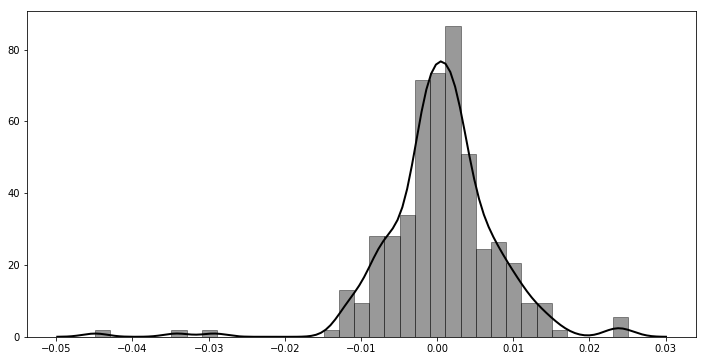

XLI
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


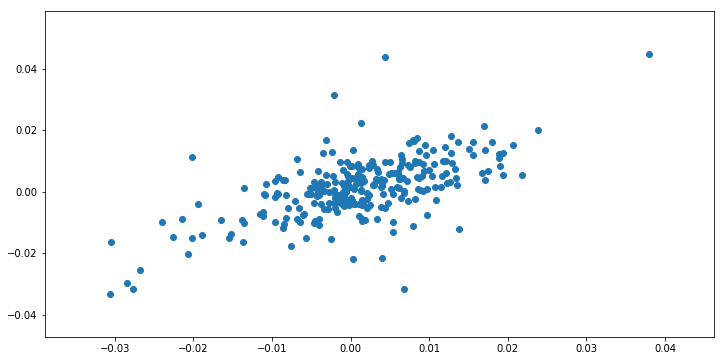

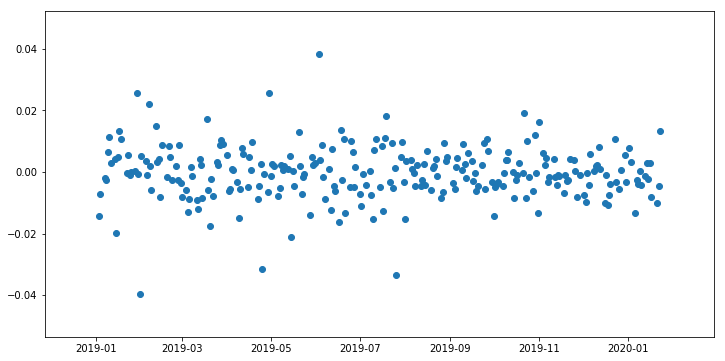

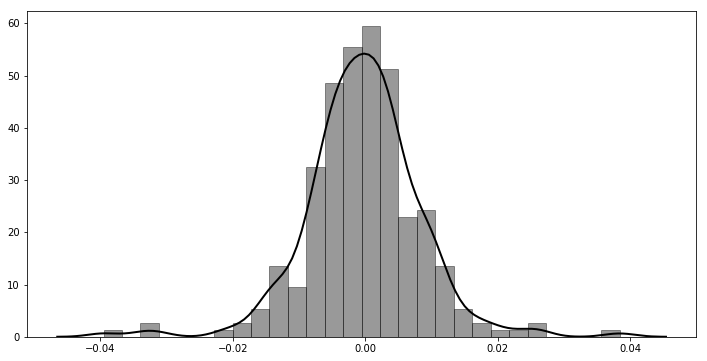

XLY
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


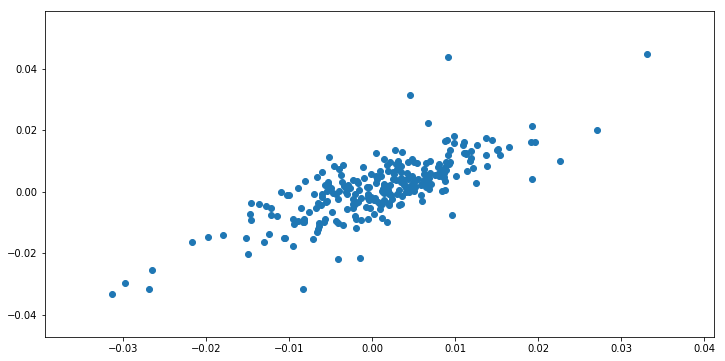

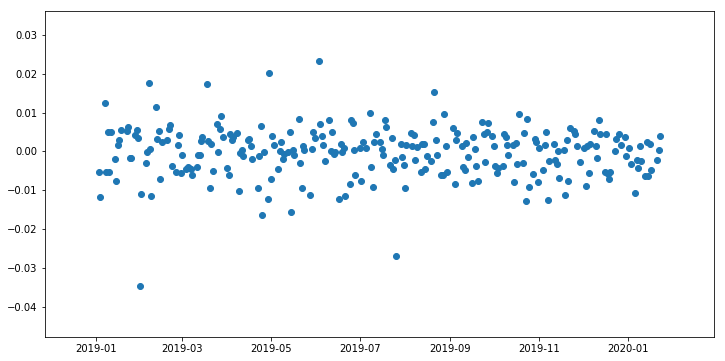

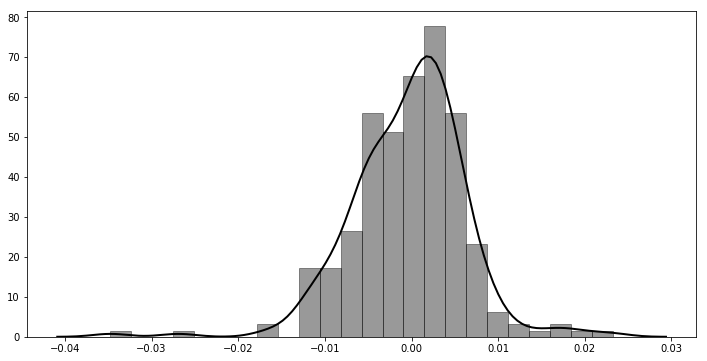

XLRE
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


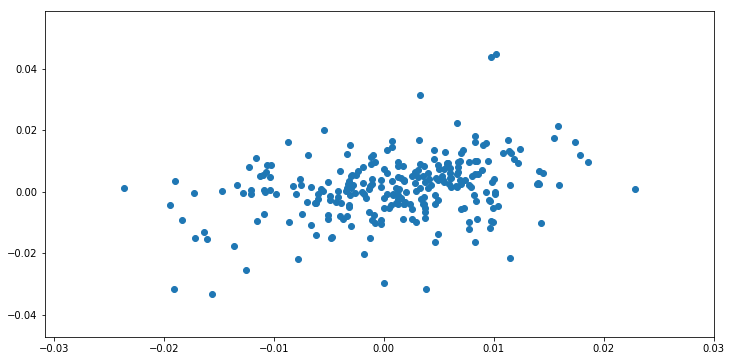

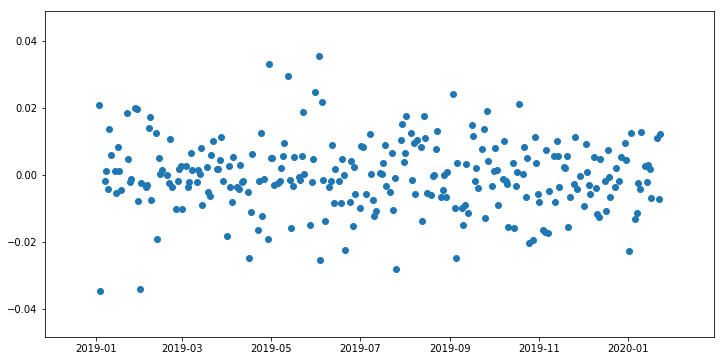

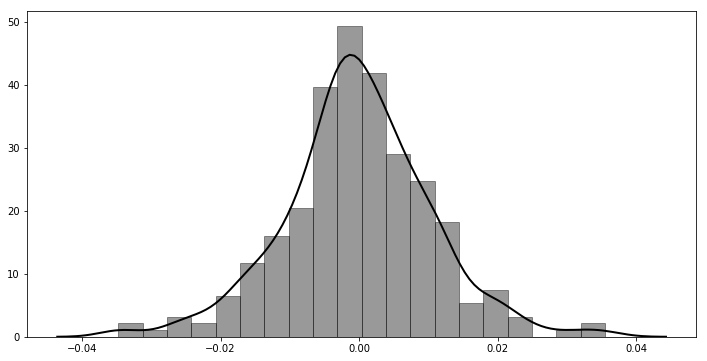

XLU
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


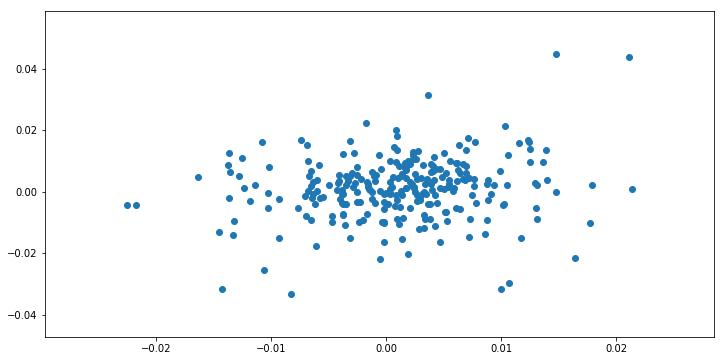

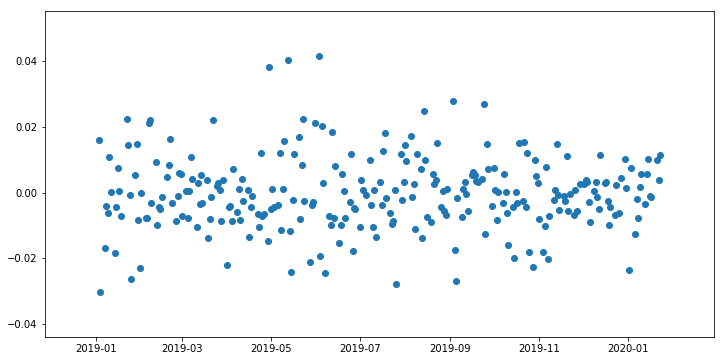

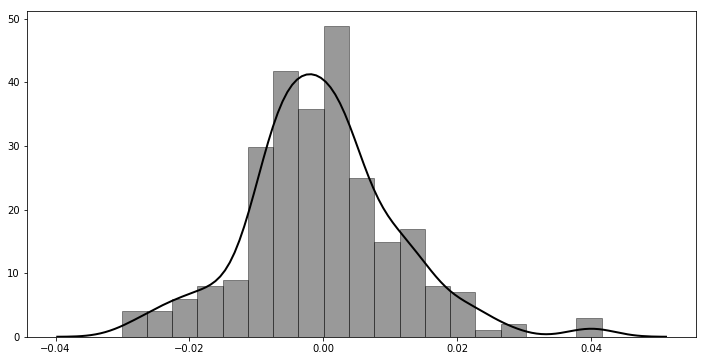

XLB
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


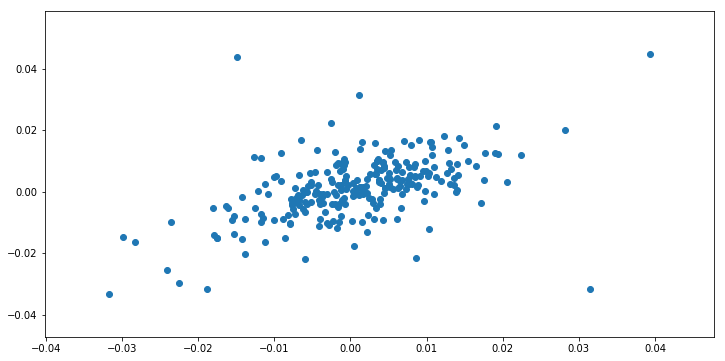

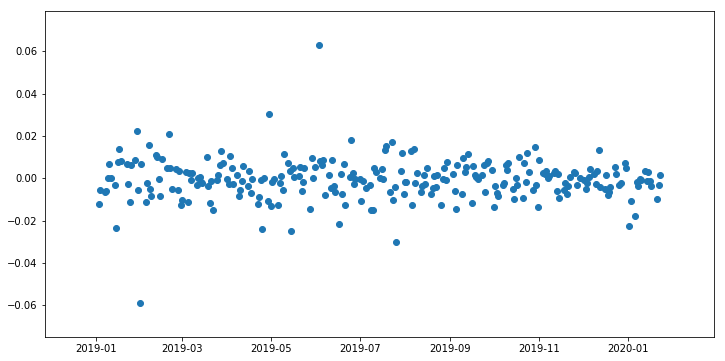

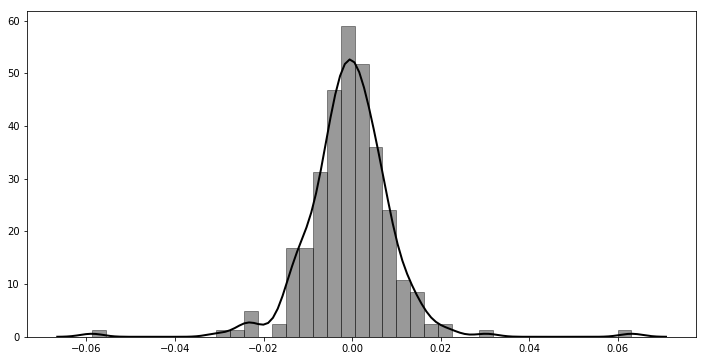

XLC
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


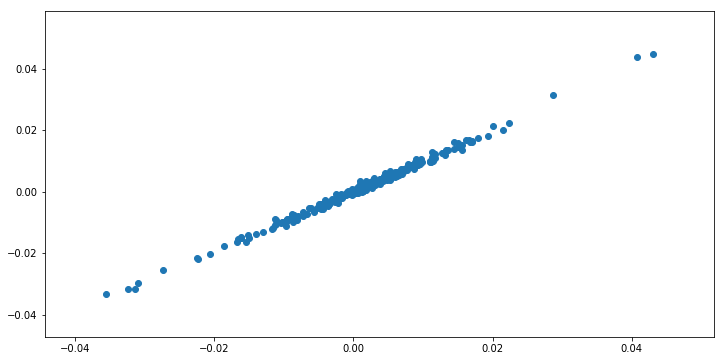

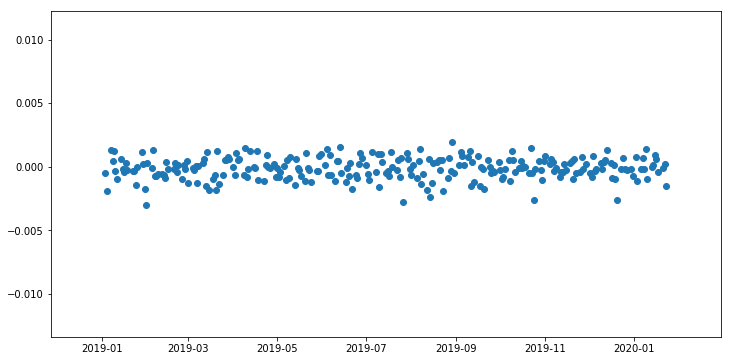

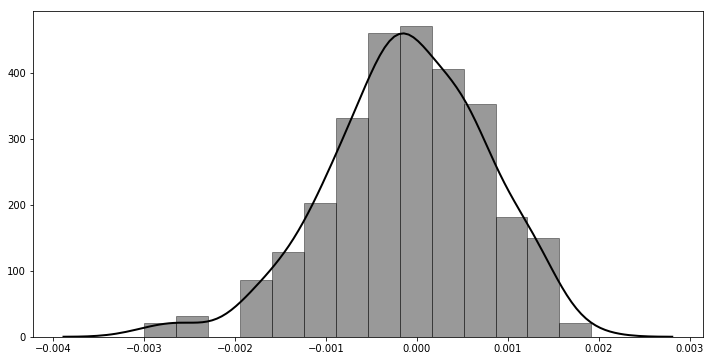

XLV
Tickers with NA Values
Symbols
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


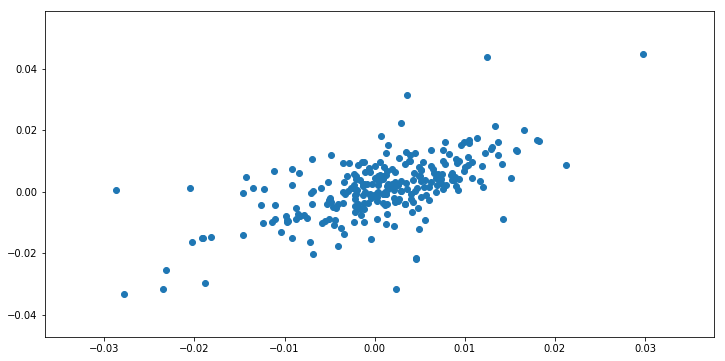

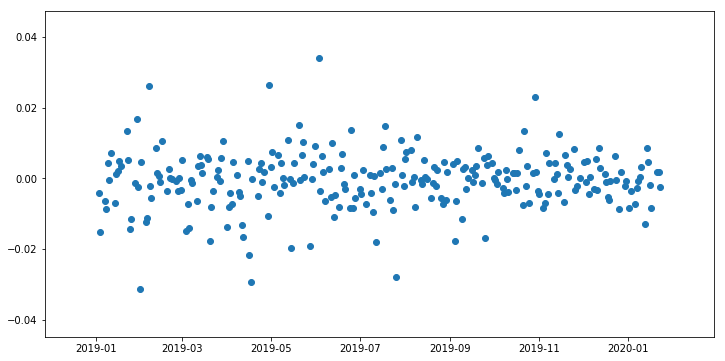

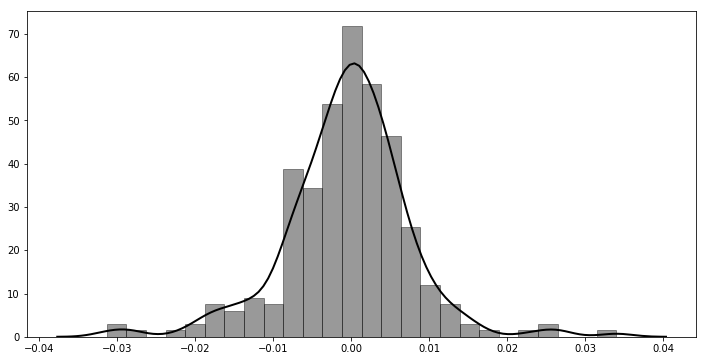

XLE
Tickers with NA Values
Symbols
CTL      3
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


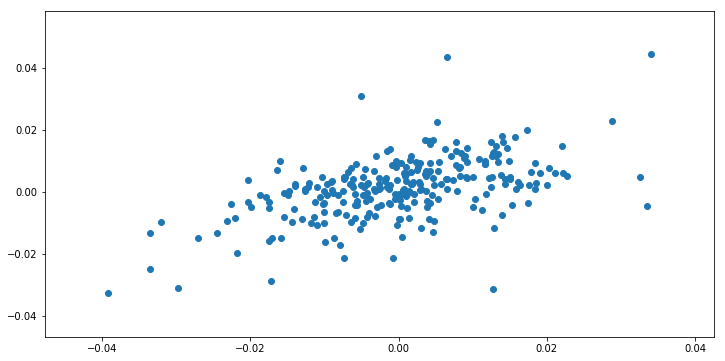

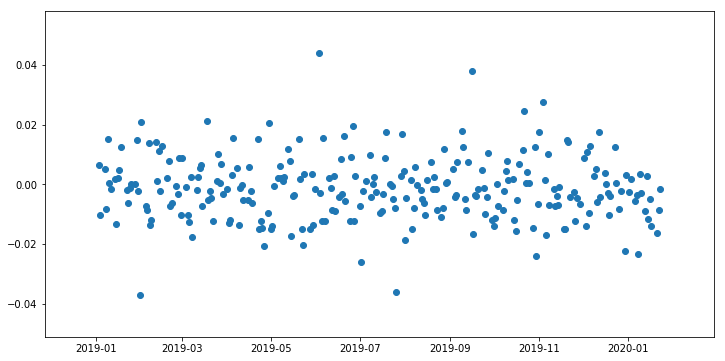

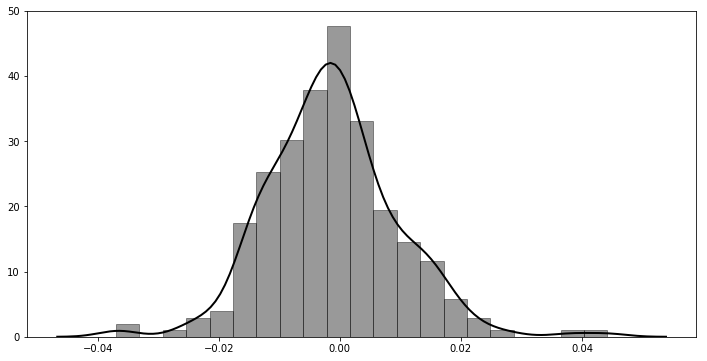

XLP
Tickers with NA Values
Symbols
CTL      3
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


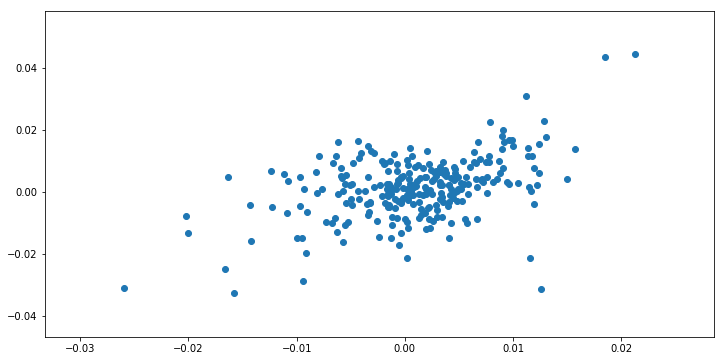

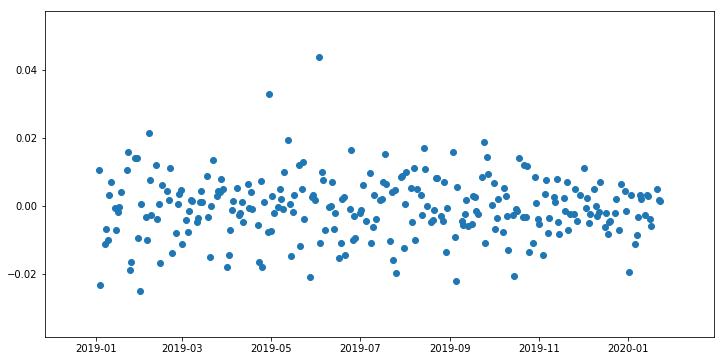

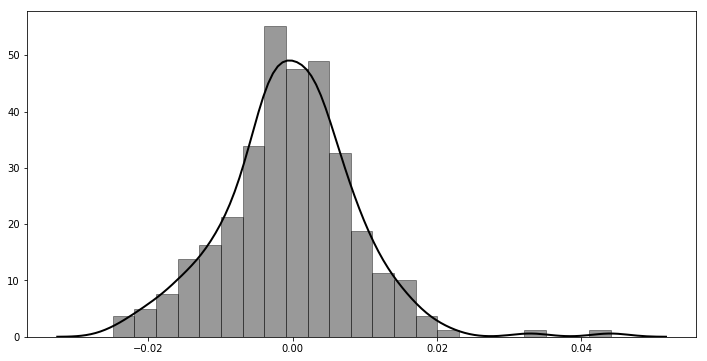

XLF
Tickers with NA Values
Symbols
CTL      3
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Show Any Empty Values
Series([], dtype: int64)
***************
Data for ETF stock prices
****************
Charts


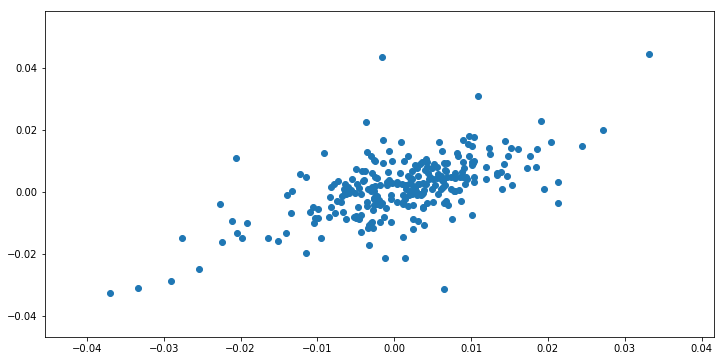

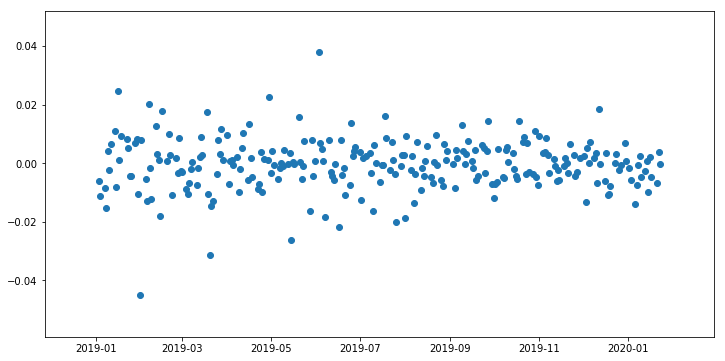

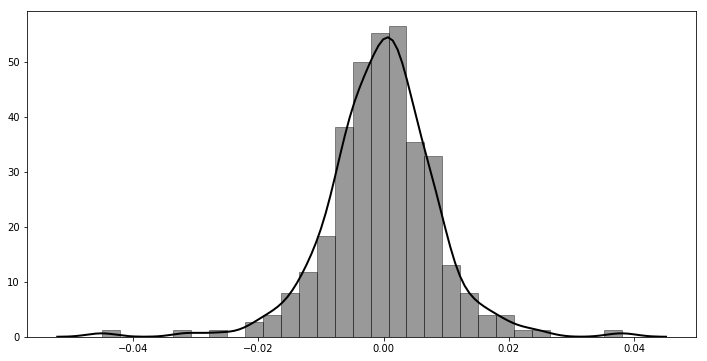

In [45]:
savingpath = 'ETFDailyData'+'/'+dt.datetime.now().strftime("%Y%m%d")
for filename in os.listdir(savingpath):
    if filename != '.DS_Store':
        tickeretf=filename.split('.')[0]
        mainhandle(savingpath+'/'+filename,dt.datetime(2019,1,1),dt.datetime(2020,1,22),tickeretf)
        time.sleep(4)